# importing packages

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import os
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
#reading the dataset
data= pd.read_excel('mavoix_ml_sample_dataset.xlsx')

Getting Basic Ideas

In [3]:
data.head(3)

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60


In [4]:
print("dataset contains {} rows and {} columns".format(data.shape[0],data.shape[1]))

dataset contains 392 rows and 23 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 23 columns):
Application_ID                392 non-null object
Current City                  392 non-null object
Python (out of 3)             392 non-null int64
R Programming (out of 3)      392 non-null int64
Deep Learning (out of 3)      392 non-null int64
PHP (out of 3)                392 non-null int64
MySQL (out of 3)              392 non-null int64
HTML (out of 3)               392 non-null int64
CSS (out of 3)                392 non-null int64
JavaScript (out of 3)         392 non-null int64
AJAX (out of 3)               392 non-null int64
Bootstrap (out of 3)          392 non-null int64
MongoDB (out of 3)            392 non-null int64
Node.js (out of 3)            392 non-null int64
ReactJS (out of 3)            392 non-null int64
Other skills                  378 non-null object
Degree                        380 non-null object
Stream                        374 non-null object
Current 

Columns description:
    
    Application_ID : unique id for the applicant
        
    Current City: Name of the city where applicant is currently living
        
    Python (out of 3): Rating of the applicant in Python Programming
        
    R Programming (out of 3): Rating of the Applicant in R Programming
        
    Deep Learning (out of 3): Rating of the Applicant in Deep Learning
        
    PHP (out of 3): Rating of the Applicant in PHP 
        
    MySQL (out of 3): Rating of the Applicant in MySQL 
        
    HTML (out of 3): Rating of the Applicant in HTML
        
    CSS (out of 3): bRating of the Applicant in CSS 
        
    JavaScript (out of 3): Rating of the Applicant in JavaScript
        
    AJAX (out of 3): Rating of the Applicant in AJAX
        
    Bootstrap (out of 3): Rating of the Applicant in Bootstrap 
        
    MongoDB (out of 3) : Rating of the Applicant in MongoDB 
        
    Node.js (out of 3): Rating of the Applicant in Node.js 
        
    ReactJS (out of 3): Rating of the Applicant in ReactJS 
        
    Other skills: Other skills applicant posses
        
    Degree: Higest educational Degree applicant posses
        
    Current Year Of Graduation: Passing Year from college
        
    Performance_PG: score of applicatant In CGPA if he/she has post Graduate Degree
        
    Performance_UG: score of applicatant In Percentage if he/she has under Graduate Degree
        
    Performance_12:score of applicatant In Percentage if he/she has completed Intermediate/PU
        
    Performance_10:score of applicatant In Percentage if he/she has completed matriculation
    
        
    
    
        
    
        
    
    
        
    
        
    
        
    
        
    
        
    
        
    
    

# Exploratory Data Analysis

From which city most of the applicatnts belong to?

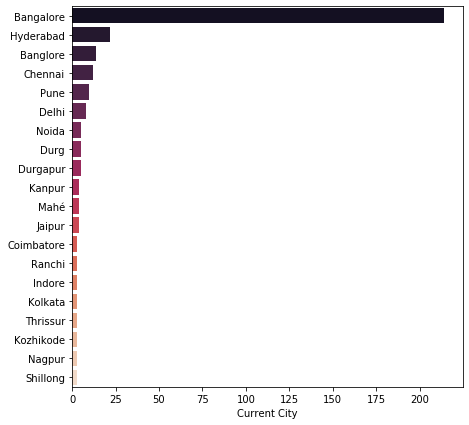

In [6]:
plt.figure(figsize=(7,7))  
Rest_locations=data['Current City'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

most of the applicants are from Bangalore

Approximately 60% Candidates are from Bangalore

Top 3 cities Bangalore,Hyderabad,Chennai all of these cities are South indian cities

Text(0.5, 0, 'Number of Applicants')

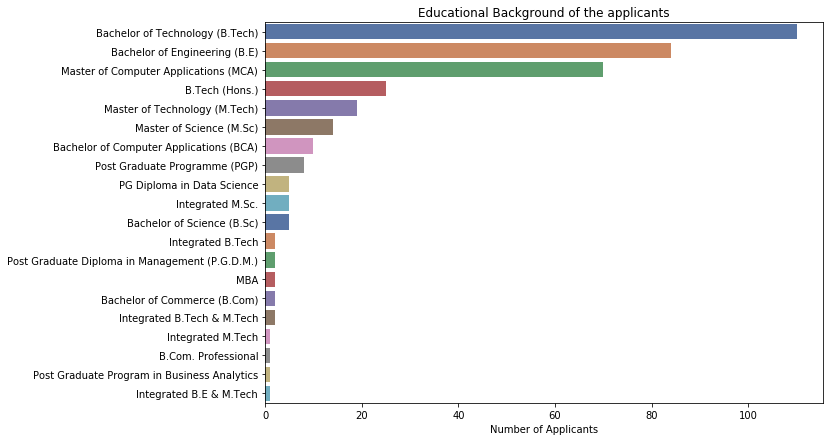

In [8]:
plt.figure(figsize=(10,7))
chains=data['Degree'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Educational Background of the applicants")
plt.xlabel("Number of Applicants")

 Most of the applicants are from Engineering Bckground

it makes sense because both the profile (a) Web Development and (b) Data Scientist needs programming skills

In [11]:
x=data['Current Year Of Graduation'].value_counts()
colors = ['#008000', '#8B0000']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Graduation year of the applicants",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')

35.2 % of the applicants who are applied for the job are graduating in year 2020

27.6 % of the applicants who are applied for the job passed out in year 2019


In [15]:
# Replacing cs with computer science
data.loc[(data.Stream == "Computer Science & Engineering"), "Stream"] = "Computer Science"
data.loc[(data.Stream == "cs"), "Stream"] = "Computer Science"
data.loc[(data.Stream == "Computer  Science"), "Stream"] = "Computer Science"
data.loc[(data.Stream == "Computer Science"), "Stream"] = "Computer Science"

#Replacing IT with Information Technology
data.loc[(data.Stream == "IT"), "Stream"] = "Information Technology"
data.loc[(data.Stream == "Information Science"), "Stream"] = "Information Technology"


Text(0.5, 0, 'Number of Applicants')

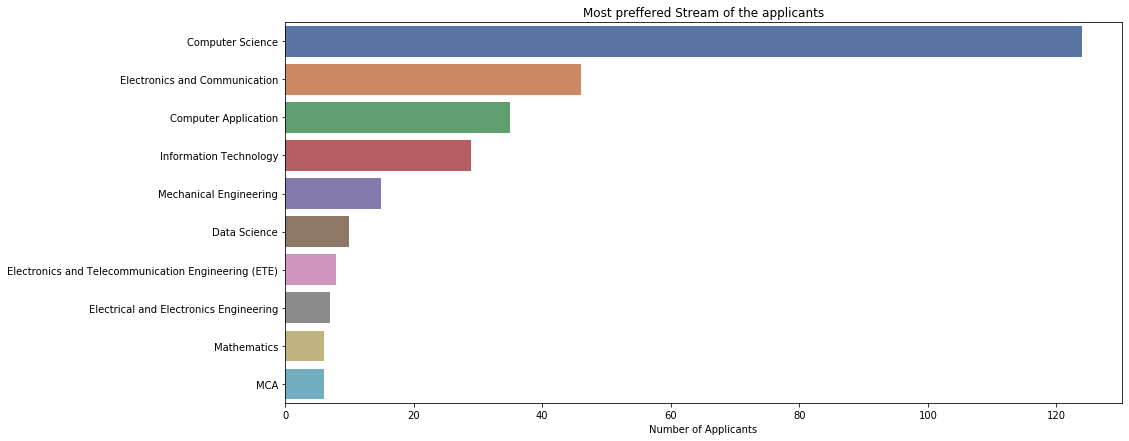

In [16]:
plt.figure(figsize=(15,7))
chains=data['Stream'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most preffered Stream of the applicants")
plt.xlabel("Number of Applicants")

top 4 stream of the applicants are CS,EC,CA & IT



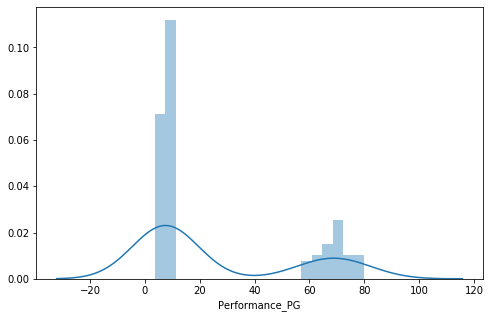

In [23]:
plt.figure(figsize=(8,5))
performence=data['Performance_PG'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>4)  else np.nan ).dropna()
sns.distplot(performence,bins=20)

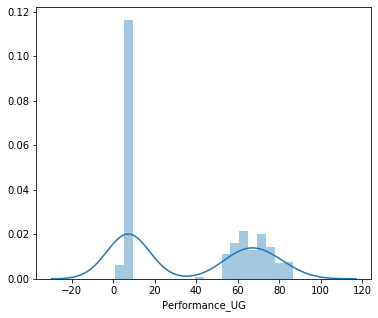

In [24]:
plt.figure(figsize=(6,5))
performence=data['Performance_UG'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>4)  else np.nan ).dropna()
sns.distplot(performence,bins=20)

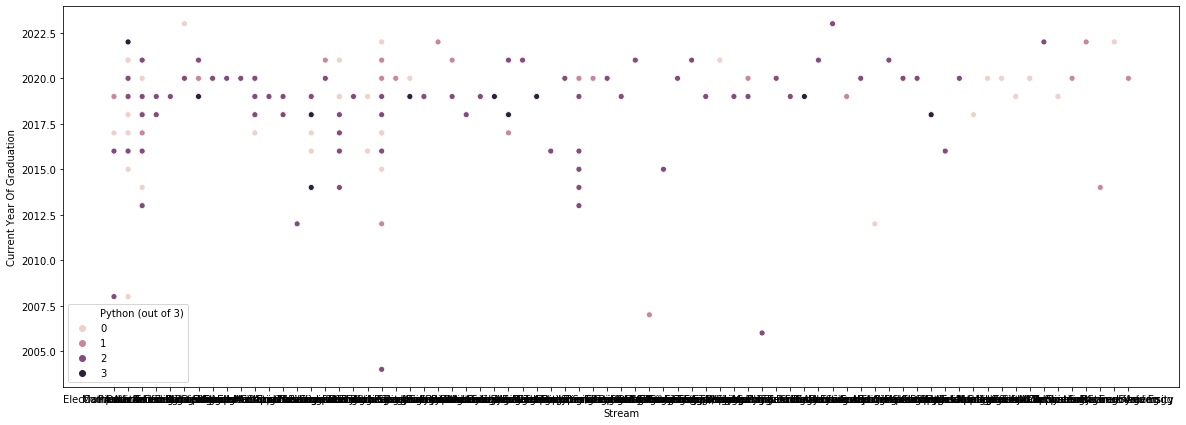

In [27]:
plt.figure(figsize=(20,7))
sns.scatterplot(x="Stream",y='Current Year Of Graduation',hue='Python (out of 3)',data=data)
plt.show()

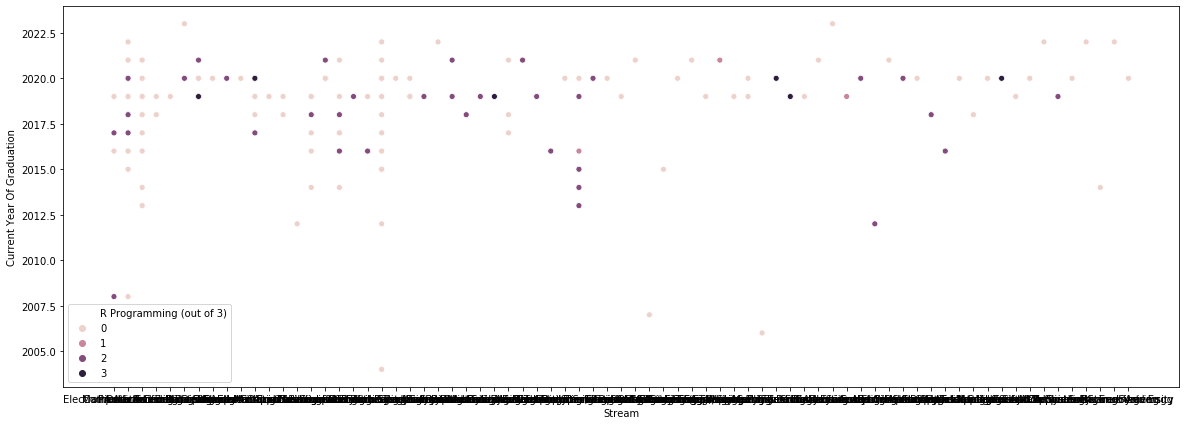

In [28]:
plt.figure(figsize=(20,7))
sns.scatterplot(x="Stream",y='Current Year Of Graduation',hue='R Programming (out of 3)',data=data)
plt.show()

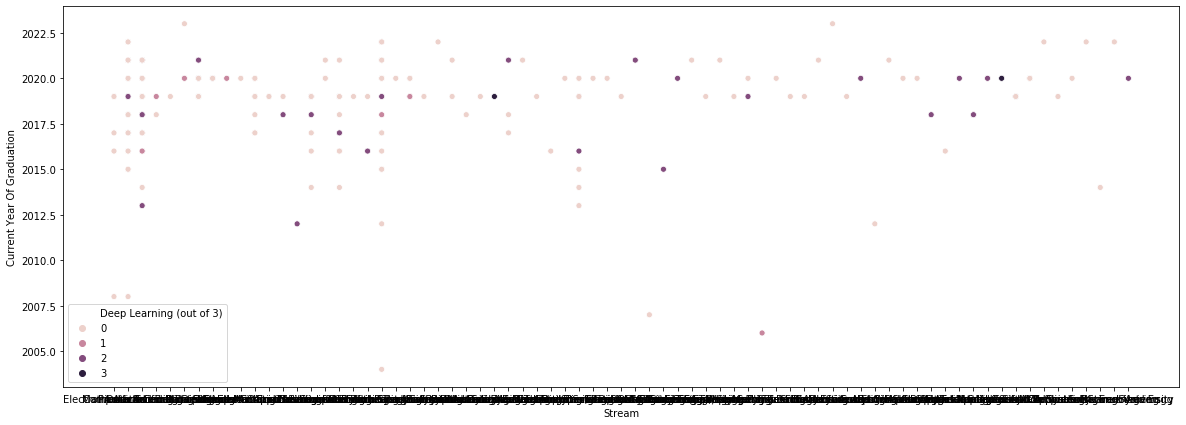

In [30]:
plt.figure(figsize=(20,7))
sns.scatterplot(x="Stream",y='Current Year Of Graduation',hue='Deep Learning (out of 3)',data=data)
plt.show()

In [31]:
data['Other skills']=data['Other skills'].apply(lambda x : x.split(',') if type(x)==str else [''])

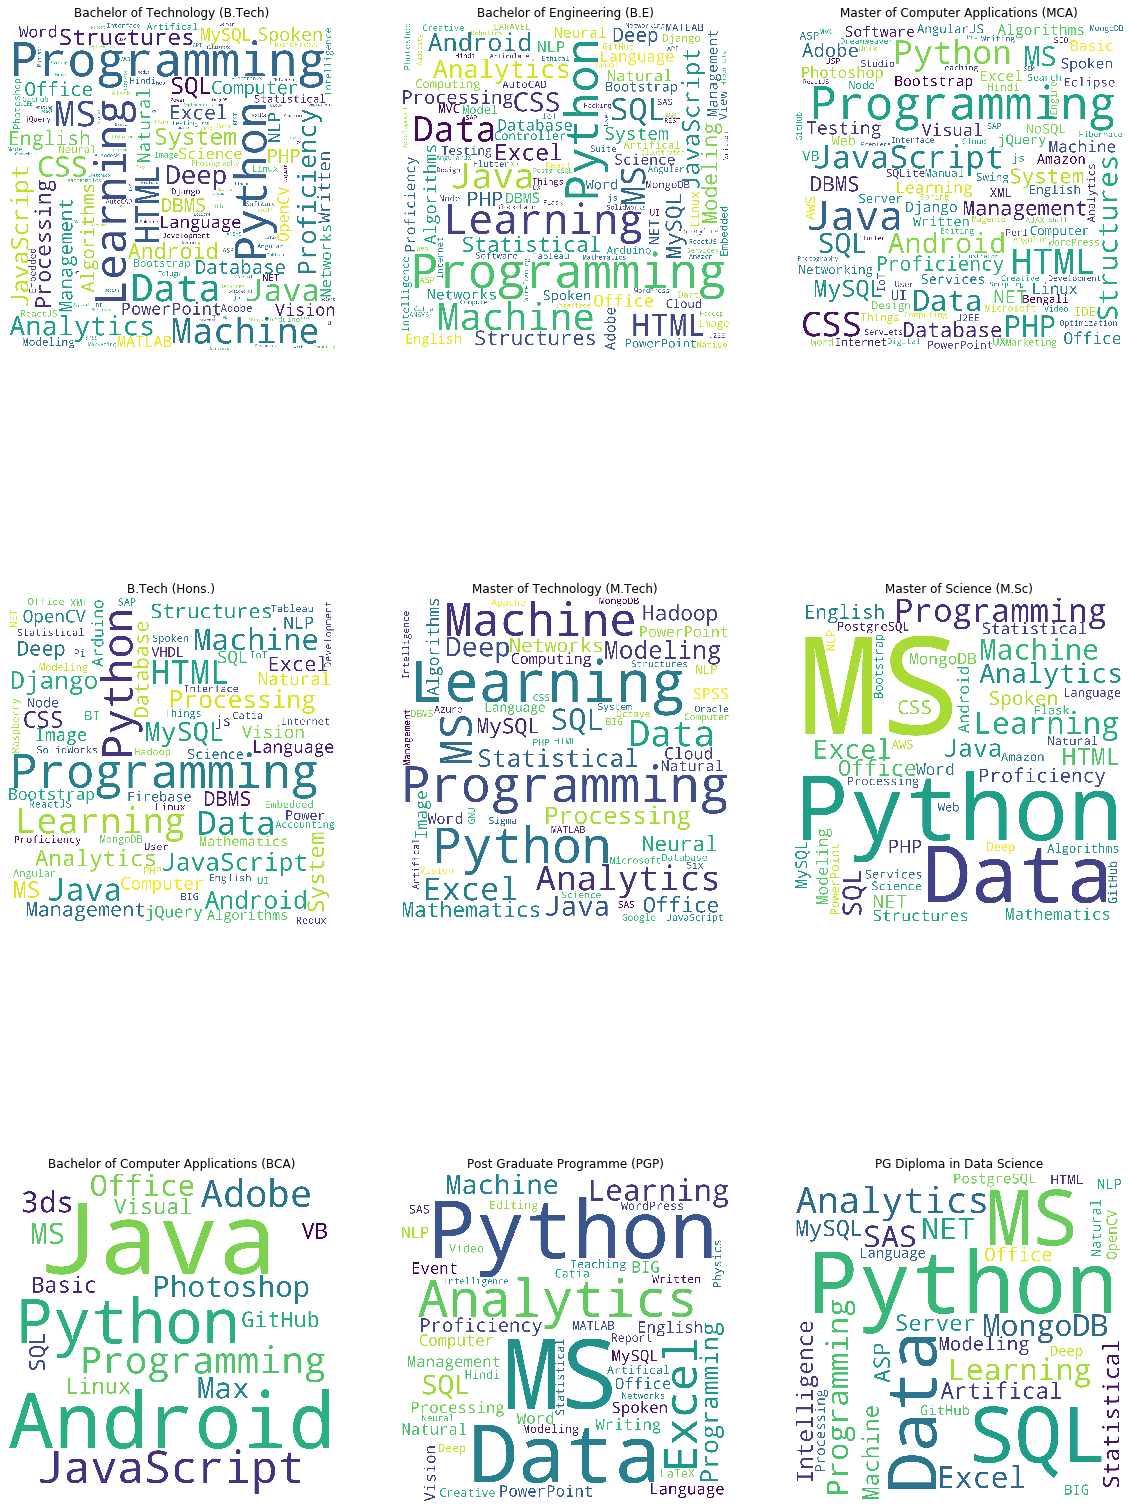

In [32]:
rest=data['Degree'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=data[data['Degree']==r]['Other skills'].values.tolist()
        corpus=','.join(x  for list_words in corpus for x in list_words)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

wordcloud of the other skill posses by applicants according to their Degree

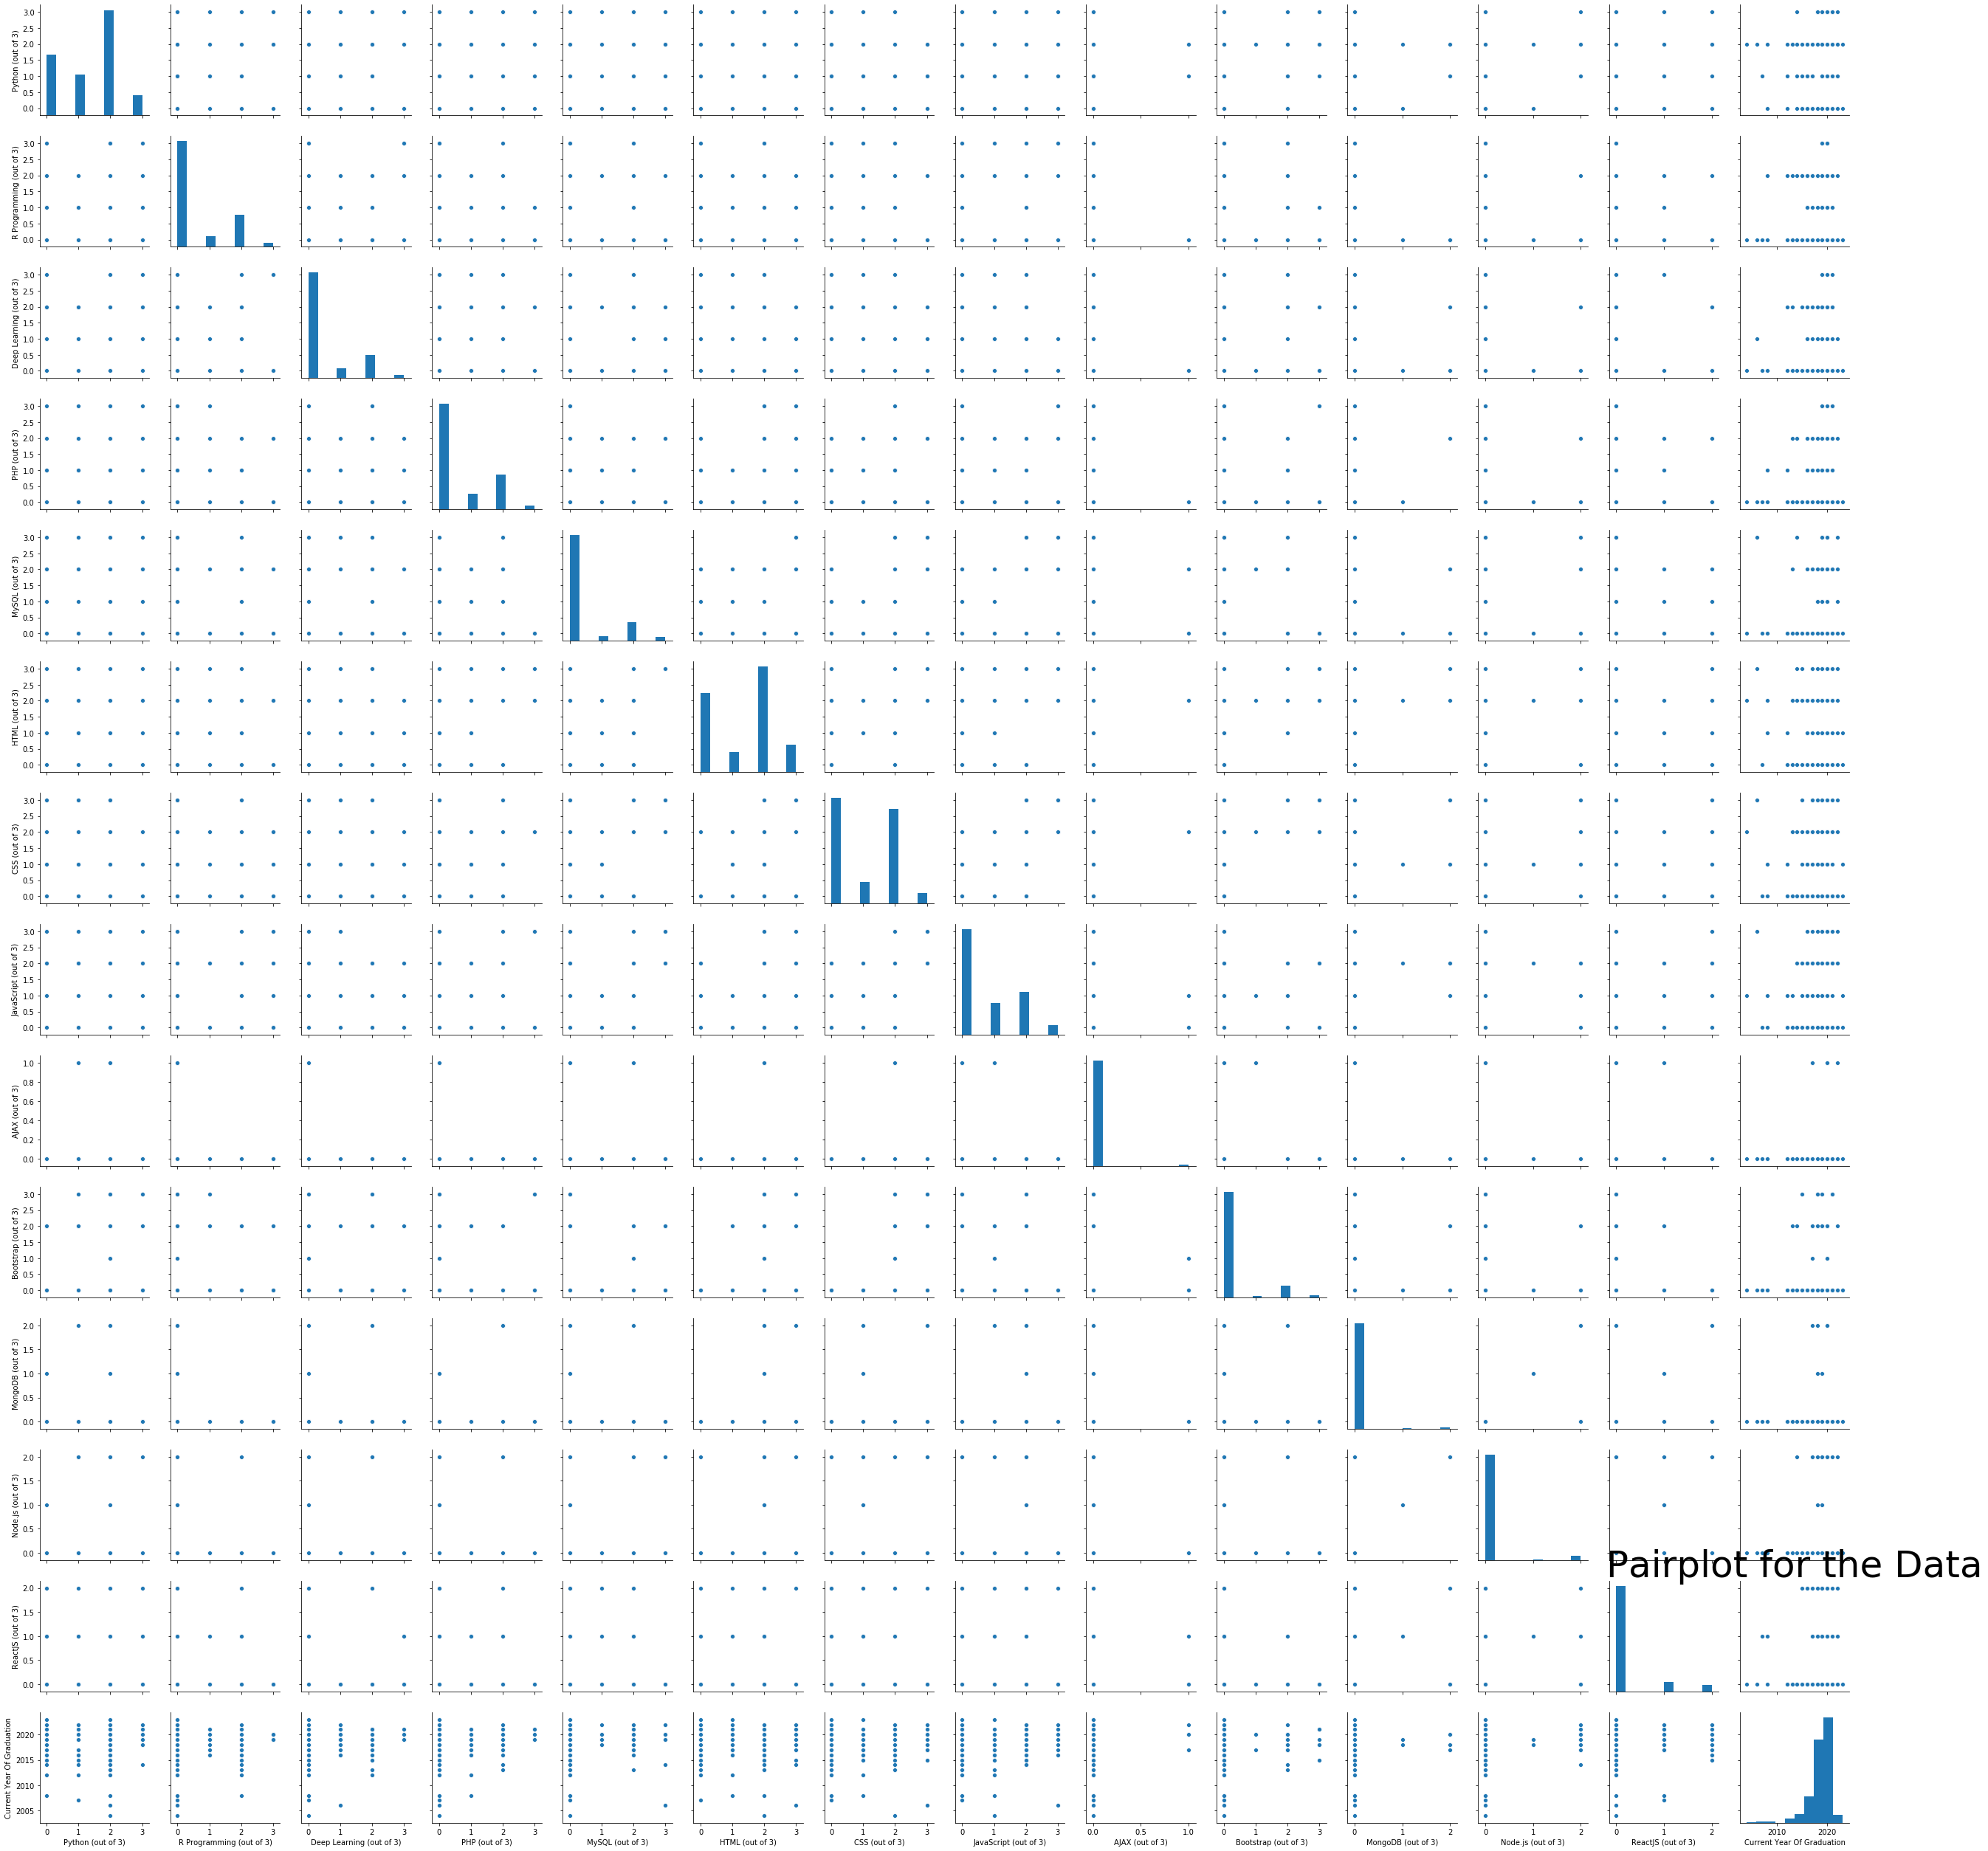

In [34]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 50)
plt.show()

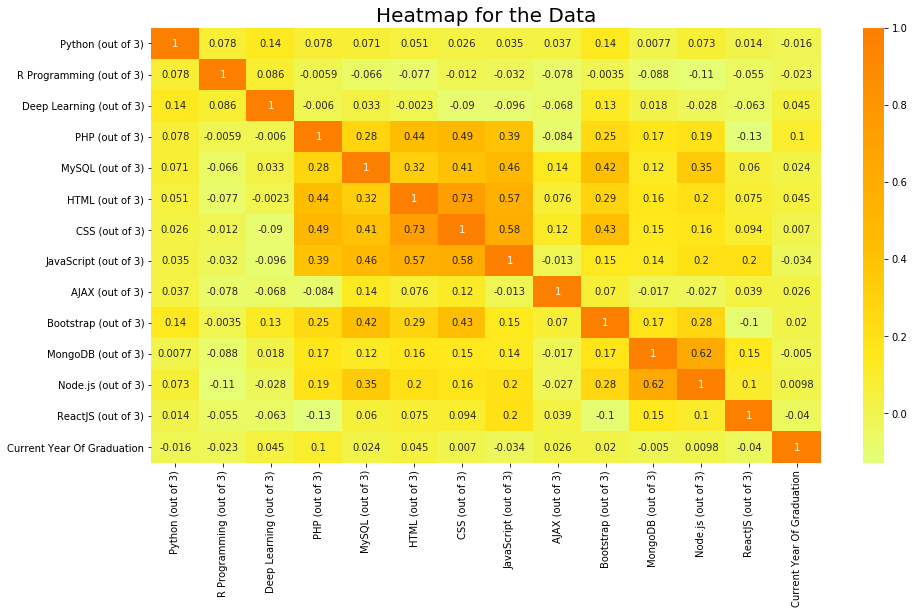

In [35]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

HTML & CSS are highly corelated.

Mongodb & node js are also corelated.


# Feature selection

In [40]:
data1=data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,14]]

# let's check the shape of data1
print(data1.shape)

(392, 13)


In [41]:
data1.head(3)

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3)
0,0,2,0,2,0,2,3,2,0,2,0,0,0
1,2,0,0,2,2,2,2,2,0,0,0,0,0
2,3,0,1,2,2,2,0,2,0,0,0,0,0


In [42]:
data1.isnull().sum()

Python (out of 3)           0
R Programming (out of 3)    0
Deep Learning (out of 3)    0
PHP (out of 3)              0
MySQL (out of 3)            0
HTML (out of 3)             0
CSS (out of 3)              0
JavaScript (out of 3)       0
AJAX (out of 3)             0
Bootstrap (out of 3)        0
MongoDB (out of 3)          0
Node.js (out of 3)          0
ReactJS (out of 3)          0
dtype: int64

In [44]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(data1)

In [45]:
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  

In [46]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [47]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

In [48]:
  
X_principal.head(2)

,P1,P2
0,0.715073,-0.077059
1,0.815916,0.008140


# Elbow Criterion:

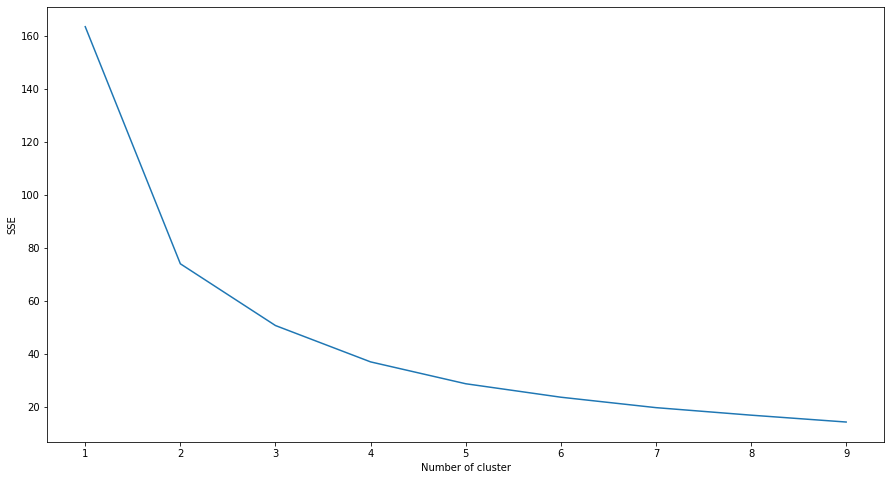

In [49]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Silhouette Coefficient Method:

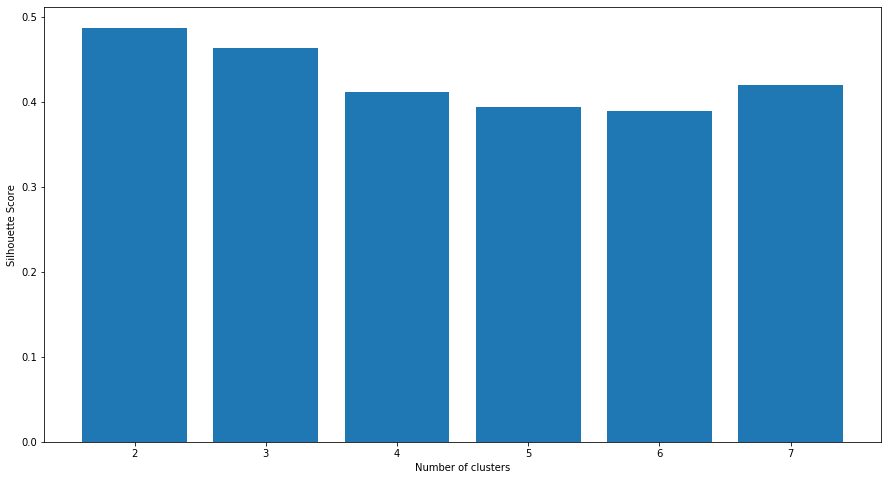

In [50]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [51]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

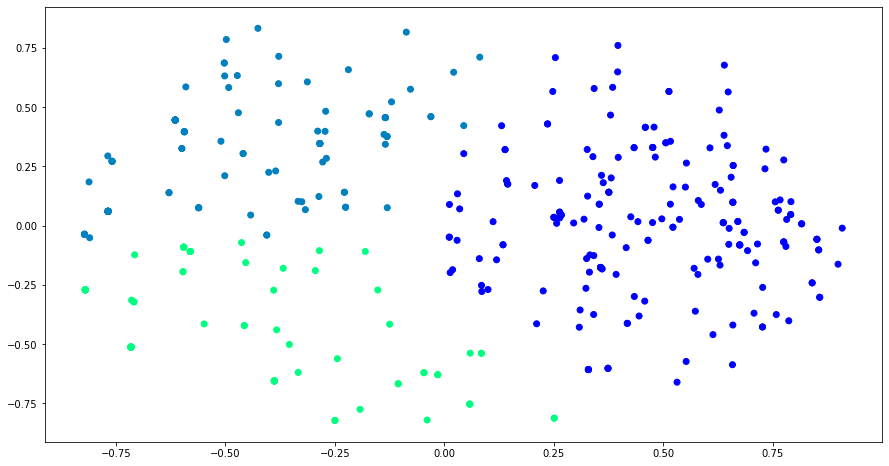

In [52]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show()